In [ ]:
# Bibliothèques pour visualiser les données
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.ticker as ticker

# Bibliothèques pour manipuler les fichiers et le calcul vectoriel
import pandas as pd
import numpy as np

# Bibliothèque pour utiliser la méthode de génétion des données SMOTE
from imblearn.over_sampling import SMOTE

# Méthodes de pre-traitement des données et de modélisation
from sklearn.model_selection import KFold
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.pipeline import Pipeline
from sklearn.model_selection import RepeatedStratifiedKFold,GridSearchCV

# Modèles à employer
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier,GradientBoostingClassifier

# Métriques pour l'évaluation
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [ ]:
#Lecture des données d'un fichier excel vers la varibale data
data=pd.read_excel("/content/drive/MyDrive/Keyrus - Python/Accidents.xlsx")

In [ ]:
data.head(20)

,Time,Day_of_week,Age_band_of_driver,Sex_of_driver,Educational_level,Vehicle_driver_relation,Driving_experience,Type_of_vehicle,Owner_of_vehicle,Area_accident_occured,...,Number_of_vehicles_involved,Number_of_casualties,Vehicle_movement,Casualty_class,Sex_of_casualty,Age_band_of_casualty,Casualty_severity,Pedestrian_movement,Cause_of_accident,Accident_severity
0,17:02:00,Monday,18-30,Male,Above high school,Employee,1-2yr,Automobile,Owner,Residential areas,...,2,2,Going straight,na,na,na,na,Not a Pedestrian,Moving Backward,Slight Injury
1,17:02:00,Monday,31-50,Male,Junior high school,Employee,Above 10yr,Public (> 45 seats),Owner,Office areas,...,2,2,Going straight,na,na,na,na,Not a Pedestrian,Overtaking,Slight Injury
2,17:02:00,Monday,18-30,Male,Junior high school,Employee,1-2yr,Lorry (41?100Q),Owner,Recreational areas,...,2,2,Going straight,Driver or rider,Male,31-50,3,Not a Pedestrian,Changing lane to the left,Serious Injury
3,01:06:00,Sunday,18-30,Male,Junior high school,Employee,5-10yr,Public (> 45 seats),Governmental,Office areas,...,2,2,Going straight,Pedestrian,Female,18-30,3,Not a Pedestrian,Changing lane to the right,Slight Injury
4,01:06:00,Sunday,18-30,Male,Junior high school,Employee,2-5yr,NaN,Owner,Industrial areas,...,2,2,Going straight,na,na,na,na,Not a Pedestrian,Overtaking,Slight Injury
5,14:15:00,Friday,31-50,Male,NaN,Unknown,NaN,NaN,NaN,NaN,...,1,1,U-Turn,Driver or rider,Male,31-50,3,Not a Pedestrian,Overloading,Slight Injury
6,17:30:00,Wednesday,18-30,Male,Junior high school,Employee,2-5yr,Automobile,Owner,Residential areas,...,1,1,Moving Backward,Driver or rider,Female,18-30,3,Not a Pedestrian,Other,Slight Injury
7,17:20:00,Friday,18-30,Male,Junior high school,Employee,2-5yr,Automobile,Governmental,Residential areas,...,2,1,U-Turn,na,na,na,na,Not a Pedestrian,No priority to vehicle,Slight Injury
8,17:20:00,Friday,18-30,Male,Junior high school,Employee,Above 10yr,Lorry (41?100Q),Owner,Industrial areas,...,2,1,Going straight,Pedestrian,Male,Under 18,3,Crossing from driver's nearside,Changing lane to the right,Slight Injury
9,17:20:00,Friday,18-30,Male,Junior high school,Employee,1-2yr,Automobile,Owner,Residential areas,...,2,1,U-Turn,Passenger,Male,18-30,3,Not a Pedestrian,Moving Backward,Serious Injury


In [ ]:
#Visualisation de 10 échantillons
data.sample(10)

,Time,Day_of_week,Age_band_of_driver,Sex_of_driver,Educational_level,Vehicle_driver_relation,Driving_experience,Type_of_vehicle,Owner_of_vehicle,Service_year_of_vehicle,...,Vehicle_movement,Casualty_class,Sex_of_casualty,Age_band_of_casualty,Casualty_severity,Work_of_casuality,Fitness_of_casuality,Pedestrian_movement,Cause_of_accident,Accident_severity
3232,09:54:00,Wednesday,31-50,Male,Elementary school,Employee,5-10yr,Automobile,Owner,NaN,...,Going straight,na,na,na,na,NaN,Normal,Not a Pedestrian,Improper parking,Slight Injury
3844,21:00:00,Saturday,31-50,Male,Elementary school,Other,Above 10yr,Public (12 seats),Governmental,NaN,...,Getting off,na,na,na,na,Driver,Normal,Not a Pedestrian,Changing lane to the left,Slight Injury
6179,13:25:00,Monday,31-50,Male,Junior high school,Employee,NaN,Long lorry,Owner,Unknown,...,Going straight,na,na,na,na,Driver,Normal,Not a Pedestrian,Changing lane to the left,Slight Injury
10023,12:44:00,Tuesday,Under 18,Male,Junior high school,Employee,2-5yr,Stationwagen,Owner,Unknown,...,Moving Backward,na,na,na,na,NaN,NaN,Not a Pedestrian,Driving carelessly,Slight Injury
11204,13:05:00,Friday,31-50,Male,Writing & reading,Employee,Below 1yr,Public (13?45 seats),Owner,2-5yrs,...,Going straight,na,na,na,na,NaN,Normal,Not a Pedestrian,Driving carelessly,Slight Injury
6460,23:00:00,Thursday,18-30,Male,Junior high school,Employee,2-5yr,Automobile,Owner,1-2yr,...,Entering a junction,na,na,na,na,NaN,NaN,Not a Pedestrian,Changing lane to the right,Slight Injury
10396,17:28:00,Thursday,31-50,Male,Junior high school,Employee,5-10yr,Lorry (41?100Q),Owner,Unknown,...,Other,Driver or rider,Male,31-50,3,Driver,Normal,Not a Pedestrian,Changing lane to the right,Serious Injury
5270,09:10:00,Thursday,31-50,Male,Junior high school,Employee,1-2yr,NaN,Owner,2-5yrs,...,Going straight,Driver or rider,Male,Over 51,3,Driver,Normal,Not a Pedestrian,Driving carelessly,Slight Injury
9079,05:55:00,Friday,31-50,Male,Elementary school,Employee,1-2yr,Other,Owner,NaN,...,Moving Backward,Driver or rider,Male,18-30,3,Driver,Normal,Not a Pedestrian,Changing lane to the left,Slight Injury
8339,11:50:00,Sunday,18-30,Male,Junior high school,NaN,NaN,Automobile,Owner,NaN,...,Going straight,na,na,na,na,Driver,Normal,Not a Pedestrian,Driving to the left,Slight Injury


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12316 entries, 0 to 12315
Data columns (total 32 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   Time                         12316 non-null  object
 1   Day_of_week                  12316 non-null  object
 2   Age_band_of_driver           12316 non-null  object
 3   Sex_of_driver                12316 non-null  object
 4   Educational_level            11575 non-null  object
 5   Vehicle_driver_relation      11737 non-null  object
 6   Driving_experience           11487 non-null  object
 7   Type_of_vehicle              11366 non-null  object
 8   Owner_of_vehicle             11834 non-null  object
 9   Service_year_of_vehicle      8388 non-null   object
 10  Defect_of_vehicle            7889 non-null   object
 11  Area_accident_occured        12077 non-null  object
 12  Lanes_or_Medians             11931 non-null  object
 13  Road_allignment              12

In [ ]:
data.describe(include="all")

,Time,Day_of_week,Age_band_of_driver,Sex_of_driver,Educational_level,Vehicle_driver_relation,Driving_experience,Type_of_vehicle,Owner_of_vehicle,Service_year_of_vehicle,...,Vehicle_movement,Casualty_class,Sex_of_casualty,Age_band_of_casualty,Casualty_severity,Work_of_casuality,Fitness_of_casuality,Pedestrian_movement,Cause_of_accident,Accident_severity
count,12316,12316,12316,12316,11575,11737,11487,11366,11834,8388,...,12008,12316,12316,12316,12316,9118,9681,12316,12316,12316
unique,1074,7,5,3,7,4,7,17,4,6,...,13,4,3,6,4,7,5,9,20,3
top,15:30:00,Friday,18-30,Male,Junior high school,Employee,5-10yr,Automobile,Owner,Unknown,...,Going straight,Driver or rider,Male,na,3,Driver,Normal,Not a Pedestrian,No distancing,Slight Injury
freq,120,2041,4271,11437,7619,9627,3363,3205,10459,2883,...,8158,4944,5253,4443,7076,5903,9608,11390,2263,10415
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
data["Accident_severity"].value_counts()

Slight Injury     10415
Serious Injury     1743
Fatal injury        158
Name: Accident_severity, dtype: int64

In [ ]:
data.isnull().sum()

Time                              0
Day_of_week                       0
Age_band_of_driver                0
Sex_of_driver                     0
Educational_level               741
Vehicle_driver_relation         579
Driving_experience              829
Type_of_vehicle                 950
Owner_of_vehicle                482
Service_year_of_vehicle        3928
Defect_of_vehicle              4427
Area_accident_occured           239
Lanes_or_Medians                385
Road_allignment                 142
Types_of_Junction               887
Road_surface_type               172
Road_surface_conditions           0
Light_conditions                  0
Weather_conditions                0
Type_of_collision               155
Number_of_vehicles_involved       0
Number_of_casualties              0
Vehicle_movement                308
Casualty_class                    0
Sex_of_casualty                   0
Age_band_of_casualty              0
Casualty_severity                 0
Work_of_casuality           

In [ ]:
data=data.drop(["Fitness_of_casuality","Work_of_casuality","Defect_of_vehicle","Service_year_of_vehicle"],axis=1)

In [ ]:
data.duplicated().sum()

0

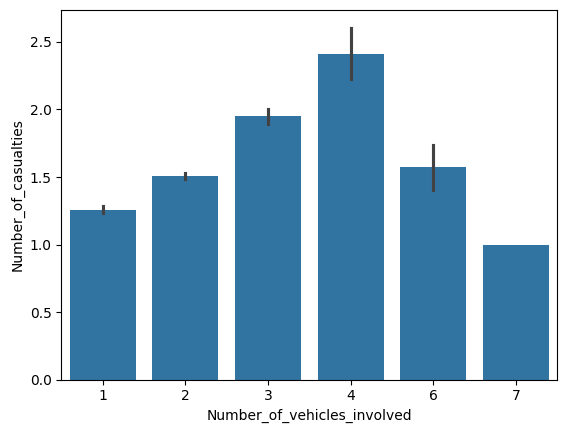

In [ ]:
sns.barplot(x=data['Number_of_vehicles_involved'], y=data['Number_of_casualties'])
plt.show()

In [ ]:
data_=data.copy()

In [ ]:
data_['Types_of_Junction'] = data_['Types_of_Junction'].fillna('Unknown')
data_['Area_accident_occured'] = data_['Area_accident_occured'].fillna('Unknown')
data_['Driving_experience'] = data_['Driving_experience'].fillna('unknown')
data_['Type_of_vehicle'] = data_['Type_of_vehicle'].fillna('Other')
data_['Vehicle_driver_relation'] = data_['Vehicle_driver_relation'].fillna('Unknown')
data_['Educational_level'] = data_['Educational_level'].fillna('Unknown')
data_['Type_of_collision'] = data_['Type_of_collision'].fillna('Unknown')

In [ ]:
X_ = ['Day_of_week','Number_of_vehicles_involved','Number_of_casualties','Area_accident_occured',
           'Types_of_Junction','Age_band_of_driver','Sex_of_driver','Educational_level',
           'Vehicle_driver_relation','Type_of_vehicle','Driving_experience','Type_of_collision',
           'Sex_of_casualty','Age_band_of_casualty','Cause_of_accident']

X = data_[X_]
y = data_['Accident_severity']

encoded_X = pd.get_dummies(X, drop_first=True)
encoded_X.shape

(12316, 100)

In [ ]:
encoded_X.head(10)

,Number_of_vehicles_involved,Number_of_casualties,Day_of_week_Monday,Day_of_week_Saturday,Day_of_week_Sunday,Day_of_week_Thursday,Day_of_week_Tuesday,Day_of_week_Wednesday,Area_accident_occured_ Recreational areas,Area_accident_occured_ Church areas,...,Cause_of_accident_No distancing,Cause_of_accident_No priority to pedestrian,Cause_of_accident_No priority to vehicle,Cause_of_accident_Other,Cause_of_accident_Overloading,Cause_of_accident_Overspeed,Cause_of_accident_Overtaking,Cause_of_accident_Overturning,Cause_of_accident_Turnover,Cause_of_accident_Unknown
0,2,2,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2,2,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
2,2,2,1,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
3,2,2,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,2,2,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
5,1,1,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
6,1,1,0,0,0,0,0,1,0,0,...,0,0,0,1,0,0,0,0,0,0
7,2,1,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
8,2,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,2,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
encoded_y = le.fit_transform(y)
print("Encoded labels:",le.classes_)
y_en = pd.Series(encoded_y)

Encoded labels: ['Fatal injury' 'Serious Injury' 'Slight Injury']


In [ ]:
from sklearn.feature_selection import SelectKBest, chi2
import pandas as pd

def feature_selection_chi2(encoded_X, encoded_y, k=60):
    fs = SelectKBest(chi2, k=k)
    X_selected = fs.fit_transform(encoded_X, encoded_y)
    selected_feature_names = encoded_X.columns[fs.get_support()]
    fs_X = pd.DataFrame(X_selected, columns=selected_feature_names)

    print(f"Selected {k} best features using chi2:")
    print("Selected Features:", selected_feature_names)
    print("Scores:", fs.scores_)

    return fs_X
selected_features = feature_selection_chi2(encoded_X, encoded_y)
print(selected_features)


Selected 60 best features using chi2:
Selected Features: Index(['Number_of_vehicles_involved', 'Number_of_casualties',
       'Day_of_week_Monday', 'Day_of_week_Saturday', 'Day_of_week_Sunday',
       'Day_of_week_Tuesday', 'Area_accident_occured_  Recreational areas',
       'Area_accident_occured_ Church areas',
       'Area_accident_occured_ Hospital areas',
       'Area_accident_occured_ Outside rural areas',
       'Area_accident_occured_Recreational areas',
       'Area_accident_occured_Residential areas',
       'Area_accident_occured_Rural village areas',
       'Area_accident_occured_Rural village areasOffice areas',
       'Types_of_Junction_No junction', 'Types_of_Junction_Other',
       'Types_of_Junction_Unknown', 'Types_of_Junction_X Shape',
       'Age_band_of_driver_31-50', 'Age_band_of_driver_Over 51',
       'Age_band_of_driver_Under 18', 'Age_band_of_driver_Unknown',
       'Sex_of_driver_Unknown', 'Vehicle_driver_relation_Owner',
       'Type_of_vehicle_Bicycle', 'T

In [ ]:
from imblearn.over_sampling import SMOTENC
n_cat_index = np.array(range(3,60))
smote = SMOTENC(categorical_features=n_cat_index, random_state=42, n_jobs=True)
X, y = smote.fit_resample(selected_features,encoded_y)
X.shape, y.shape


((31245, 60), (31245,))

In [ ]:
from sklearn.model_selection import train_test_split, GridSearchCV, StratifiedKFold
from sklearn.pipeline import make_pipeline
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import classification_report, confusion_matrix

def prepare_data(X, y):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    return X_train, X_test, y_train, y_test

def train_evaluate_model(X_train, y_train, X_test, y_test, classifier, param_grid):
    pipeline = make_pipeline(classifier)
    cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
    grid_search = GridSearchCV(pipeline, param_grid, scoring='f1_macro', cv=cv, n_jobs=-1)
    grid_search.fit(X_train, y_train)
    best_params = grid_search.best_params_

    print("Best Hyperparameters:", best_params)

    y_pred = grid_search.predict(X_test)

    print("Classification Report:")
    print(classification_report(y_test, y_pred))
    print("Confusion Matrix:")
    print(confusion_matrix(y_test, y_pred))

X_train, X_test, y_train, y_test = prepare_data(X, y)

rf_classifier = RandomForestClassifier(random_state=42)
xgb_classifier = XGBClassifier(random_state=42)

rf_param_grid = {
    'randomforestclassifier__n_estimators': [100, 200,400,800],
    'randomforestclassifier__criterion': ['entropy'],
}

xgb_param_grid = {
    'xgbclassifier__n_estimators': [200,400,600,800],
    'xgbclassifier__learning_rate': [0.1, 0.2, 0.3],
}

train_evaluate_model(X_train, y_train, X_test, y_test, rf_classifier, rf_param_grid)
train_evaluate_model(X_train, y_train, X_test, y_test, xgb_classifier, xgb_param_grid)


Best Hyperparameters: {'randomforestclassifier__criterion': 'entropy', 'randomforestclassifier__n_estimators': 800}
Classification Report:
              precision    recall  f1-score   support

           0       0.94      0.99      0.96      2085
           1       0.91      0.81      0.85      2100
           2       0.86      0.91      0.89      2064

    accuracy                           0.90      6249
   macro avg       0.90      0.90      0.90      6249
weighted avg       0.90      0.90      0.90      6249

Confusion Matrix:
[[2054    8   23]
 [ 129 1698  273]
 [  11  170 1883]]
Best Hyperparameters: {'xgbclassifier__learning_rate': 0.3, 'xgbclassifier__n_estimators': 600}
Classification Report:
              precision    recall  f1-score   support

           0       0.93      0.99      0.96      2085
           1       0.85      0.81      0.83      2100
           2       0.86      0.85      0.86      2064

    accuracy                           0.88      6249
   macro avg    